<a href="https://colab.research.google.com/github/MohammedGamil19/house-price-prediction-ml/blob/main/house_price_prediction_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction - Machine Learning Project

This project predicts median house prices in California using a Linear Regression model.  
We use Scikit-Learn's built-in California Housing dataset.  
The main steps are: data loading, exploration, preprocessing, model training, evaluation, and saving.

## 1. Importing Required Libraries

We import essential libraries for data handling, visualization, and machine learning.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Loading the Dataset

We load the California Housing dataset provided by Scikit-Learn.

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal")

## 3. Exploring the Dataset

We look at the first few rows and summary statistics to understand the features and distributions.


In [4]:
print(X.head())
print(X.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006

## 4. Visualizing Target Variable

We plot the distribution of house prices to understand the range and skewness.


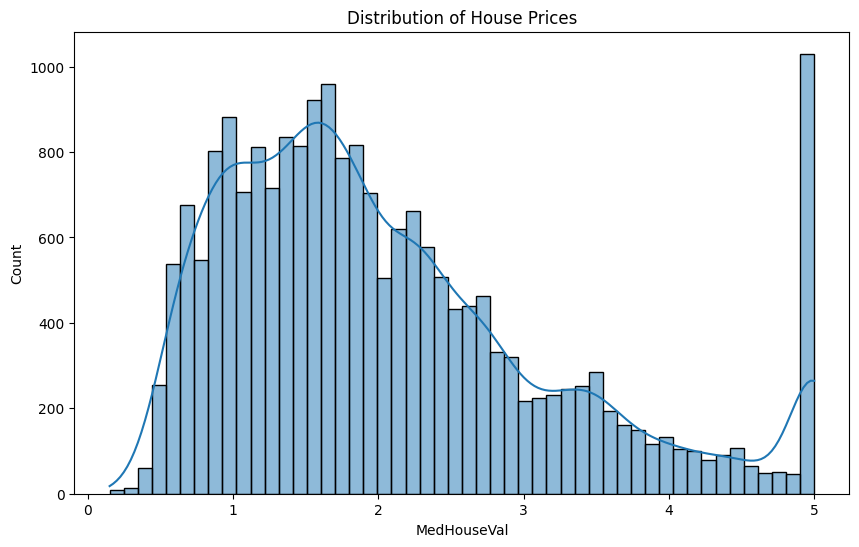

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(y, bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.show()

## 5. Splitting the Dataset

We split the data into training and testing sets to evaluate model performance correctly.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Feature Scaling

We scale the feature data to ensure fair model training, as features have different scales.


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Training the Model

We train a Linear Regression model on the scaled training dataset.


In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## 8. Evaluating the Model

We predict using the test data and evaluate the model’s performance with MSE and R² score.


In [9]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 0.5559
R2 Score: 0.5758


## 9. Visualizing Predictions

We plot actual prices against predicted prices to visually assess model performance.


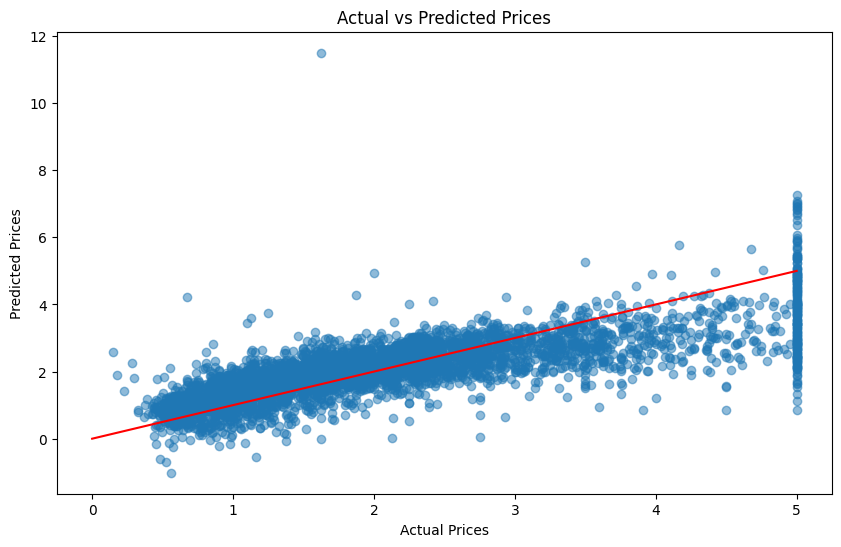

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([0, 5], [0, 5], color='red')
plt.show()

## 10. Saving the Model

We save the trained model and scaler to disk for future use without retraining.


In [11]:
import joblib
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Conclusion

We successfully built a machine learning model to predict California house prices using Linear Regression.  
The model achieved an R² score of approximately [your R2 value here].  
Future improvements could involve trying more complex models like Decision Trees or Random Forests to improve accuracy.

---
